In [1]:
## Import analysis modules
import pandas as p
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import Imputer

## Import visualization modules
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
path = "/home/avelkoski/backup-20191201/backup-20190404/Teaching/DSC441/2020-Summer/Labs/loan/"

In [3]:
## Read in file
data = p.read_csv(path + 'loan.csv',delimiter='~}',na_values='nan',engine='python')

In [4]:
## Basic information about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Columns: 112 entries, id to Unnamed: 111
dtypes: float64(82), int64(6), object(24)
memory usage: 36.3+ MB


In [5]:
## To view a small sample of a Series or DataFrame object, use .head() and .tail() methods
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Unnamed: 111
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [6]:
## To view a small sample of a Series or DataFrame object, use .head() and .tail() methods
data.tail(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Unnamed: 111
42532,72176,70868,2525,2525,225.0,36 months,9.33%,80.69,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42533,71623,70735,6500,6500,0.0,36 months,8.38%,204.84,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42534,70686,70681,5000,5000,0.0,36 months,7.75%,156.11,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
## Get feature (column) names
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'Unnamed: 111'],
      dtype='object', length=112)

In [8]:
## Get instances (rows) in multidimensional array
data.values

array([[1077501, 1296599, 5000, ..., nan, nan, nan],
       [1077430, 1314167, 2500, ..., nan, nan, nan],
       [1077175, 1313524, 2400, ..., nan, nan, nan],
       ...,
       [72176, 70868, 2525, ..., nan, nan, nan],
       [71623, 70735, 6500, ..., nan, nan, nan],
       [70686, 70681, 5000, ..., nan, nan, nan]], dtype=object)

In [9]:
## Indexing and selecting data w/ .loc position (primarily label based; useful w/ index labels)
data.loc[0]

id                                                                          1077501
member_id                                                                   1296599
loan_amnt                                                                      5000
funded_amnt                                                                    5000
funded_amnt_inv                                                                4975
term                                                                      36 months
int_rate                                                                     10.65%
installment                                                                  162.87
grade                                                                             B
sub_grade                                                                        B2
emp_title                                                                       NaN
emp_length                                                                10

In [10]:
## Indexing and selecting data w/ .loc position (primarily label based)
data.loc[0,['id','member_id','tax_liens']]

id           1077501
member_id    1296599
tax_liens          0
Name: 0, dtype: object

In [11]:
## Indexing and selecting data w/ .loc position (primarily label based)
data.loc[0:3,['id','member_id','tax_liens']]

,id,member_id,tax_liens
0,1077501,1296599,0.0
1,1077430,1314167,0.0
2,1077175,1313524,0.0
3,1076863,1277178,0.0


In [12]:
## Indexing and selecting data w/ .iloc position (primarily integer / position based)
data.iloc[0]

id                                                                          1077501
member_id                                                                   1296599
loan_amnt                                                                      5000
funded_amnt                                                                    5000
funded_amnt_inv                                                                4975
term                                                                      36 months
int_rate                                                                     10.65%
installment                                                                  162.87
grade                                                                             B
sub_grade                                                                        B2
emp_title                                                                       NaN
emp_length                                                                10

In [13]:
## Indexing and selecting data w/ .iloc position (primarily integer / position based)
data.iloc[1:3,1:4]

,member_id,loan_amnt,funded_amnt
1,1314167,2500,2500
2,1313524,2400,2400


In [14]:
## Indexing and selecting data w/ "[]" aka __getitem__ (useful for selecting lower-dimension slices)
data['tax_liens'][2:5]

2    0.0
3    0.0
4    0.0
Name: tax_liens, dtype: float64

In [15]:
## Indexing and selecting data w/ "[]" aka __getitem__ (useful for selecting lower-dimension slices)
data[['member_id','loan_amnt',"tax_liens"]][2:5]

,member_id,loan_amnt,tax_liens
2,1313524,2400,0.0
3,1277178,10000,0.0
4,1311748,3000,0.0


In [16]:
## Indexing and selecting data w/ attributes
data.member_id[2:15]

2     1313524
3     1277178
4     1311748
5     1311441
6     1304742
7     1288686
8     1306957
9     1306721
10    1305201
11    1305008
12    1298717
13    1304956
14    1303503
Name: member_id, dtype: int64

In [17]:
## More advanced Indexing and selecting 
data[(data['loan_amnt']==10000)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Unnamed: 111
3,1076863,1277178,10000,10000,10000.000000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
14,1069057,1303503,10000,10000,10000.000000,36 months,10.65%,325.74,B,B2,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
16,1065775,1299699,10000,10000,10000.000000,36 months,15.27%,347.98,C,C4,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
22,1069710,1304821,10000,10000,10000.000000,36 months,11.71%,330.76,B,B3,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
23,1069700,1304810,10000,10000,10000.000000,36 months,11.71%,330.76,B,B3,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
32,1065420,1299514,10000,10000,9975.000000,60 months,15.96%,242.97,C,C5,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
47,1069283,1304166,10000,10000,10000.000000,36 months,10.65%,325.74,B,B2,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
48,1069287,1304171,10000,10000,10000.000000,36 months,6.03%,304.36,A,A1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
57,1068487,1302882,10000,10000,10000.000000,36 months,12.42%,334.16,B,B4,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
58,1043961,1274517,10000,10000,10000.000000,36 months,10.65%,325.74,B,B2,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [18]:
## More advanced Indexing and selecting 
data[(data['loan_amnt']<5000) & (data['grade']=='B') & (data['sub_grade']=='B1')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Unnamed: 111
13,1069866,1304956,3000,3000,3000.000000,36 months,9.91%,96.68,B,B1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
271,1065932,1300077,3200,3200,3200.000000,36 months,9.91%,103.12,B,B1,...,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
456,1063964,1296535,4000,4000,4000.000000,36 months,9.91%,128.90,B,B1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
562,1062535,1294602,3000,3000,3000.000000,36 months,9.91%,96.68,B,B1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
567,1062510,1294575,2000,2000,2000.000000,36 months,9.91%,64.45,B,B1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
576,1062564,1294433,2000,2000,2000.000000,36 months,9.91%,64.45,B,B1,...,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
698,1046507,1277552,3050,3050,3050.000000,36 months,9.91%,98.29,B,B1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
912,1058110,1289687,2200,2200,2200.000000,36 months,9.91%,70.90,B,B1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1283,1053251,1284825,2400,2400,2400.000000,36 months,9.91%,77.34,B,B1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1301,1052871,1284421,2700,2700,2700.000000,36 months,9.91%,87.01,B,B1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [19]:
## More advanced Indexing and selecting 
data.query("(loan_amnt < 5000) & (grade == 'B') & (term == ' 36 months')")

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Unnamed: 111
13,1069866,1304956,3000,3000,3000.000000,36 months,9.91%,96.68,B,B1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
28,1069799,1304678,4000,4000,4000.000000,36 months,11.71%,132.31,B,B3,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
65,1069102,1303750,3500,3500,3500.000000,36 months,10.65%,114.01,B,B2,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
109,1068292,1302706,2100,2100,2100.000000,36 months,12.42%,70.18,B,B4,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
141,1068095,1302453,4200,4200,4200.000000,36 months,11.71%,138.92,B,B3,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
174,1067563,1301944,4000,4000,4000.000000,36 months,12.42%,133.67,B,B4,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
230,1066598,1300783,2500,2500,2500.000000,36 months,11.71%,82.69,B,B3,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
233,1066520,1300495,4225,4225,4225.000000,36 months,12.42%,141.18,B,B4,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
251,1048526,1279867,4000,4000,4000.000000,36 months,12.69%,134.18,B,B5,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
271,1065932,1300077,3200,3200,3200.000000,36 months,9.91%,103.12,B,B1,...,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [20]:
## More advanced Indexing and Selecting
data[data['loan_amnt'].isin([4500,5000,10000])]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Unnamed: 111
0,1077501,1296599,5000,5000,4975.000000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.000000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.000000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
14,1069057,1303503,10000,10000,10000.000000,36 months,10.65%,325.74,B,B2,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
16,1065775,1299699,10000,10000,10000.000000,36 months,15.27%,347.98,C,C4,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
22,1069710,1304821,10000,10000,10000.000000,36 months,11.71%,330.76,B,B3,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
23,1069700,1304810,10000,10000,10000.000000,36 months,11.71%,330.76,B,B3,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
27,1069657,1304764,5000,5000,5000.000000,60 months,16.77%,123.65,D,D2,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
32,1065420,1299514,10000,10000,9975.000000,60 months,15.96%,242.97,C,C5,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
33,1069591,1304289,5000,5000,5000.000000,36 months,8.90%,158.77,A,A5,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [21]:
## Selecting random samples w/ replacement
data.sample(n=5,replace=True,random_state=5236)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Unnamed: 111
30839,503412,647889,4000,4000,3500.0,36 months,10.25%,129.54,B,B2,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
29893,517790,669224,4500,4500,4500.0,36 months,10.99%,147.31,B,B4,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15204,753594,953250,24000,24000,24000.0,36 months,15.62%,839.28,D,D1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
21571,642819,822720,7050,7050,7050.0,36 months,8.88%,223.80,B,B1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
42341,144961,144952,19650,19650,5275.0,36 months,17.54%,705.87,G,G4,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [22]:
## Count of instances and features
rows, columns = data.shape
print (data.shape)

(42535, 112)


In [23]:
rows

42535

In [24]:
## Get basic statistics for continuous features
numeric = data.describe(include=['number']).T.reset_index()
numeric.rename(columns={'index':'feature'},inplace=True)
numeric.insert(1,'missing',(rows - numeric['count'])/ float(rows))
numeric[0:5]

,feature,missing,count,mean,std,min,25%,50%,75%,max
0,id,0.0,42535.0,664579.852310,219302.219319,54734.0,498392.5,644250.0,825822.5,1077501.0
1,member_id,0.0,42535.0,825702.551170,279540.905635,70473.0,638479.5,824178.0,1033946.5,1314167.0
2,loan_amnt,0.0,42535.0,11089.722581,7410.938391,500.0,5200.0,9700.0,15000.0,35000.0
3,funded_amnt,0.0,42535.0,10821.585753,7146.914675,500.0,5000.0,9600.0,15000.0,35000.0
4,funded_amnt_inv,0.0,42535.0,10139.830603,7131.686446,0.0,4950.0,8500.0,14000.0,35000.0


In [25]:
## Examine features with count missing > .60
numeric[numeric['missing']>.40][0:5]

,feature,missing,count,mean,std,min,25%,50%,75%,max
10,mths_since_last_delinq,0.633032,15609.0,35.017618,22.418427,0.0,17.0,33.0,51.0,120.0
11,mths_since_last_record,0.914165,3651.0,59.175568,47.145396,0.0,0.0,85.0,101.0,129.0
27,mths_since_last_major_derog,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,annual_inc_joint,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,dti_joint,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
## Examine features with std == 0 
numeric[numeric['std']==0]

,feature,missing,count,mean,std,min,25%,50%,75%,max
26,collections_12_mths_ex_med,0.003409,42390.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,policy_code,0.000000,42535.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
54,chargeoff_within_12_mths,0.003409,42390.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
## How many features can we eliminate?
drop = numeric[(numeric['missing']==1) | (numeric['std']==0)]
drop

,feature,missing,count,mean,std,min,25%,50%,75%,max
26,collections_12_mths_ex_med,0.003409,42390.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,mths_since_last_major_derog,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,policy_code,0.000000,42535.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
29,annual_inc_joint,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,dti_joint,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,verification_status_joint,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,tot_coll_amt,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,tot_cur_bal,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,open_acc_6m,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,open_il_6m,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
## Drop the unhelpful features from the base and numeric table
data = data.drop(drop['feature'],axis=1)
numeric = numeric[~numeric['feature'].isin(drop['feature'])]

In [29]:
## Get basic statistics for discrete features
discrete = data.describe(include=['object']).T.reset_index()
discrete.rename(columns={'index':'feature'},inplace=True)
discrete.insert(1,'missing',(rows - discrete['count'])/ float(rows))
discrete[0:5]

,feature,missing,count,unique,top,freq
0,term,0,42535,2,36 months,31534
1,int_rate,0,42535,394,10.99%,970
2,grade,0,42535,7,B,12389
3,sub_grade,0,42535,35,B3,2997
4,emp_title,0.0617374,39909,30658,US Army,139


In [30]:
## Examine features with frequency == rows
discrete[discrete['freq']==rows]

,feature,missing,count,unique,top,freq
19,initial_list_status,0,42535,1,f,42535
23,application_type,0,42535,1,INDIVIDUAL,42535


In [31]:
## Examine features with missing >.60
discrete[discrete['missing']>.60]

,feature,missing,count,unique,top,freq
21,next_pymnt_d,0.915811,3581,102,Aug-2016,642


In [32]:
## How many features can we eliminate?
ddrop = discrete[(discrete['missing']>.6) | (discrete['unique']==1)]
ddrop

,feature,missing,count,unique,top,freq
19,initial_list_status,0,42535,1,f,42535
21,next_pymnt_d,0.915811,3581,102,Aug-2016,642
23,application_type,0,42535,1,INDIVIDUAL,42535


In [33]:
## Drop unhelpful features from the base table
data = data.drop(ddrop['feature'],axis=1)
discrete = discrete[~discrete['feature'].isin(ddrop['feature'])]

In [34]:
## How many columns do we have left?
data.shape

(42535, 51)

In [35]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.000000,36 months,10.65%,162.87,B,B2,...,0.00,0.00,0.0000,Jan-2015,171.62,Jul-2016,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.000000,60 months,15.27%,59.83,C,C4,...,0.00,117.08,1.1100,Apr-2013,119.66,Sep-2013,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.000000,36 months,15.96%,84.33,C,C5,...,0.00,0.00,0.0000,Jun-2014,649.91,Jul-2016,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.000000,36 months,13.49%,339.31,C,C1,...,16.97,0.00,0.0000,Jan-2015,357.48,Apr-2016,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.000000,60 months,12.69%,67.79,B,B5,...,0.00,0.00,0.0000,Aug-2016,67.79,Jul-2016,0.0,0.0,0.0,0.0
5,1075269,1311441,5000,5000,5000.000000,36 months,7.90%,156.46,A,A4,...,0.00,0.00,0.0000,Jan-2015,161.03,Jan-2016,0.0,0.0,0.0,0.0
6,1069639,1304742,7000,7000,7000.000000,60 months,15.96%,170.08,C,C5,...,0.00,0.00,0.0000,May-2016,1313.76,May-2016,0.0,0.0,0.0,0.0
7,1072053,1288686,3000,3000,3000.000000,36 months,18.64%,109.43,E,E1,...,0.00,0.00,0.0000,Jan-2015,111.34,Dec-2014,0.0,0.0,0.0,0.0
8,1071795,1306957,5600,5600,5600.000000,60 months,21.28%,152.39,F,F2,...,0.00,189.06,2.0900,Apr-2012,152.39,Aug-2012,0.0,0.0,0.0,0.0
9,1071570,1306721,5375,5375,5350.000000,60 months,12.69%,121.45,B,B5,...,0.00,269.29,2.5200,Nov-2012,121.45,Mar-2013,0.0,0.0,0.0,0.0


In [36]:
## Let's see if we have any nulls
data.isnull().any()

id                         False
member_id                  False
loan_amnt                  False
funded_amnt                False
funded_amnt_inv            False
term                       False
int_rate                   False
installment                False
grade                      False
sub_grade                  False
emp_title                   True
emp_length                  True
home_ownership             False
annual_inc                  True
verification_status        False
issue_d                    False
loan_status                False
pymnt_plan                 False
url                        False
desc                        True
purpose                    False
title                       True
zip_code                   False
addr_state                 False
dti                        False
delinq_2yrs                 True
earliest_cr_line            True
inq_last_6mths              True
mths_since_last_delinq      True
mths_since_last_record      True
open_acc  

In [37]:
## Impute missing cases
imp = Imputer(missing_values='NaN',strategy='median',axis=0)
data['delinq_2yrs'] = imp.fit_transform(data['delinq_2yrs'].values.reshape(-1,1))

/home/avelkoski/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [38]:
data['delinq_2yrs'].isnull().any()

False

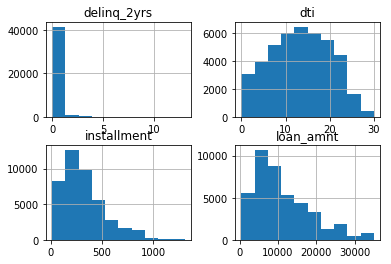

In [39]:
## Standard histograms with pandas
data.loc[:,['loan_amnt','installment','dti','delinq_2yrs']].hist()
plt.show()

/home/avelkoski/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/avelkoski/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


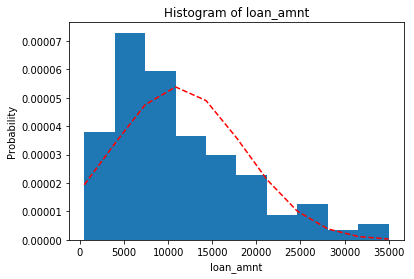

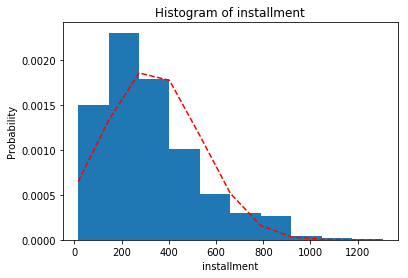

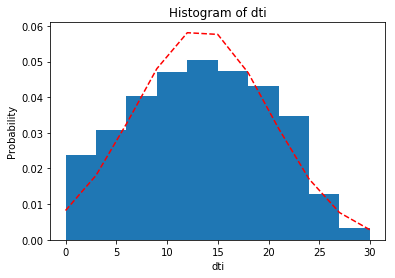

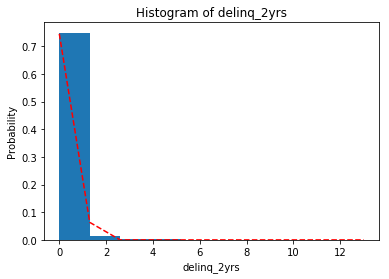

In [40]:
## Iter over a few numeric feature distributions with matplotlib
for col in ['loan_amnt','installment','dti','delinq_2yrs']:
    row = numeric[numeric['feature']==col]
    mu, sig = row['mean'], row['std']
    n, bins, patches = plt.hist(data[col],bins=10, normed=1)
    y = mlab.normpdf(bins, float(mu), float(sig))
    plt.plot(bins, y, 'r--')
    plt.xlabel(col)
    plt.ylabel('Probability')
    plt.title('Histogram of ' + col)
    plt.show()

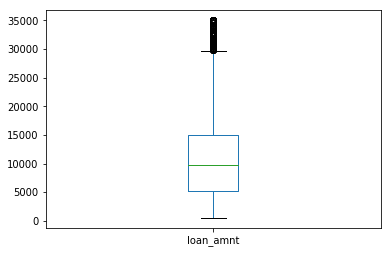

In [41]:
## Standard box plots with pandas
data['loan_amnt'].plot.box()
plt.show()

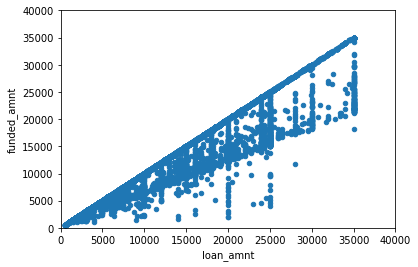

In [42]:
## Standard scatter plot with pandas
data.plot.scatter(x='loan_amnt',y='funded_amnt')
plt.xlim(0,40000)
plt.ylim(0,40000)
plt.show()

In [43]:
## Let's calculate pearsons' correlation
pearson = data.loc[:,numeric['feature'][2:]].corr(method='pearson')

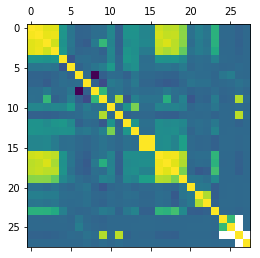

In [44]:
## Plot correlation coefficients
plt.matshow(pearson)
plt.show()

In [45]:
pearson

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
loan_amnt,1.000000,0.981746,0.929598,0.930869,0.276122,0.065112,-0.032558,-0.030314,0.022833,0.033717,...,0.850325,0.729449,4.286055e-02,0.131140,0.069803,0.447140,-0.005777,-0.003974,-0.037557,-0.005963
funded_amnt,0.981746,1.000000,0.947525,0.956522,0.272067,0.064821,-0.033209,-0.030048,0.024098,0.025119,...,0.868211,0.736726,4.528945e-02,0.132002,0.071746,0.451663,-0.005627,-0.003938,-0.038855,-0.006001
funded_amnt_inv,0.929598,0.947525,1.000000,0.890148,0.252338,0.071086,-0.043571,-0.074911,0.104690,0.488968,...,0.840568,0.726846,1.949537e-02,0.114054,0.053064,0.440878,-0.012589,-0.006200,-0.046120,-0.006242
installment,0.930869,0.956522,0.890148,1.000000,0.278339,0.054948,-0.019894,-0.010882,0.003996,-0.042947,...,0.844485,0.634012,5.698516e-02,0.116613,0.074059,0.399727,-0.004109,-0.003495,-0.033746,-0.005929
annual_inc,0.276122,0.272067,0.252338,0.278339,1.000000,-0.116559,0.022148,0.027764,-0.000751,-0.002071,...,0.260066,0.187968,9.476740e-03,0.023967,0.015842,0.139247,-0.000926,-0.001809,-0.015437,-0.001828
dti,0.065112,0.064821,0.071086,0.054948,-0.116559,1.000000,-0.036392,0.014241,0.066960,0.129753,...,0.040752,0.104573,-1.117968e-02,0.021872,0.007690,0.003656,-0.013132,-0.009262,0.008671,-0.003346
delinq_2yrs,-0.032558,-0.033209,-0.043571,-0.019894,0.022148,-0.036392,1.000000,0.020872,-0.525531,-0.057269,...,-0.038868,0.020294,3.375845e-02,0.012886,0.014160,-0.013784,0.072845,0.121651,0.004708,-0.001452
inq_last_6mths,-0.030314,-0.030048,-0.074911,-0.010882,0.027764,0.014241,0.020872,1.000000,-0.046555,-0.172404,...,-0.070121,-0.012766,6.153548e-02,0.036971,0.036384,-0.007470,0.002658,0.015604,0.047311,0.022088
mths_since_last_delinq,0.022833,0.024098,0.104690,0.003996,-0.000751,0.066960,-0.525531,-0.046555,1.000000,0.484924,...,0.030435,0.016411,-3.417201e-02,-0.008407,-0.014218,0.019979,-0.024295,-0.012199,0.018826,-0.012604
mths_since_last_record,0.033717,0.025119,0.488968,-0.042947,-0.002071,0.129753,-0.057269,-0.172404,0.484924,1.000000,...,0.022079,0.153114,-1.133094e-01,-0.018019,-0.033499,0.106497,-0.035999,-0.020779,0.821834,0.020230


/home/avelkoski/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


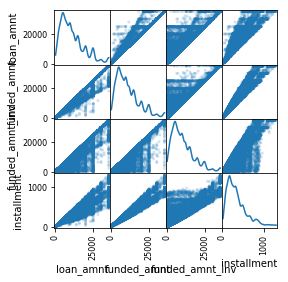

In [46]:
## Let's create a scatter plot matrix 
scatter_matrix(data.loc[:,numeric.loc[2:5,'feature']], alpha=0.2, figsize=(4, 4), diagonal='kde')
plt.show()

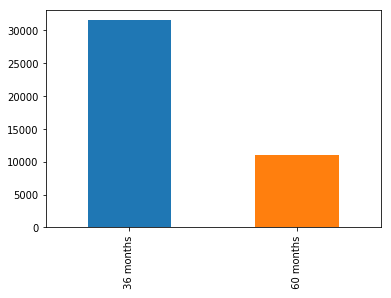

In [47]:
## Bar chart
data['term'].value_counts().plot(kind='bar')
plt.show()

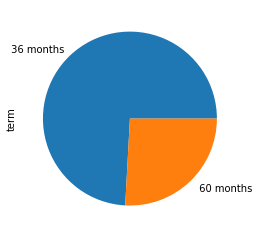

In [48]:
## Pie chart
data['term'].value_counts().plot(kind='pie')
plt.show()

In [49]:
## Let's take a look at a string feature
data['term'][0]

' 36 months'

In [50]:
## Address by stripping leading space
data['term'] = data['term'].str.strip()

In [51]:
## Check if that worked
data['term'][0]

'36 months'

In [52]:
## Seperate input features from target feature
x = data.drop('loan_status',1)
y = data['loan_status']

In [53]:
x[0:5]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,0.00,Jan-2015,171.62,Jul-2016,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,0.00,Jun-2014,649.91,Jul-2016,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,0.00,Aug-2016,67.79,Jul-2016,0.0,0.0,0.0,0.0


In [54]:
y

0                                               Fully Paid
1                                              Charged Off
2                                               Fully Paid
3                                               Fully Paid
4                                                  Current
5                                               Fully Paid
6                                               Fully Paid
7                                               Fully Paid
8                                              Charged Off
9                                              Charged Off
10                                              Fully Paid
11                                              Fully Paid
12                                             Charged Off
13                                              Fully Paid
14                                             Charged Off
15                                              Fully Paid
16                                              Fully Pa